In [5]:
import pandas as pd
import sklearn  
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn. preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from simpletransformers.ner import NERModel, NERArgs
import pickle
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('ner_datasetreference.csv', encoding='latin1')
df

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
...,...,...,...,...
1048570,NaN,they,PRP,O
1048571,NaN,responded,VBD,O
1048572,NaN,to,TO,O
1048573,NaN,the,DT,O


In [9]:
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [7]:
df = df.fillna(method = 'ffill')
df.head(25)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [8]:
df['Sentence #'] = LabelEncoder().fit_transform(df['Sentence #'])
df.head(25)

,Sentence #,Word,POS,Tag
0,0,Thousands,NNS,O
1,0,of,IN,O
2,0,demonstrators,NNS,O
3,0,have,VBP,O
4,0,marched,VBN,O
5,0,through,IN,O
6,0,London,NNP,B-geo
7,0,to,TO,O
8,0,protest,VB,O
9,0,the,DT,O


In [9]:
df.rename(columns = {'Sentence #':'sentence_id', 'Word':'words', 'Tag':'labels'}, inplace = True)
df.head(25)

,sentence_id,words,POS,labels
0,0,Thousands,NNS,O
1,0,of,IN,O
2,0,demonstrators,NNS,O
3,0,have,VBP,O
4,0,marched,VBN,O
5,0,through,IN,O
6,0,London,NNP,B-geo
7,0,to,TO,O
8,0,protest,VB,O
9,0,the,DT,O


In [10]:
df['labels'] = df['labels'].str.upper()
df.head(25)

,sentence_id,words,POS,labels
0,0,Thousands,NNS,O
1,0,of,IN,O
2,0,demonstrators,NNS,O
3,0,have,VBP,O
4,0,marched,VBN,O
5,0,through,IN,O
6,0,London,NNP,B-GEO
7,0,to,TO,O
8,0,protest,VB,O
9,0,the,DT,O


In [11]:
x = df[['sentence_id', 'words']]
y = df['labels']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(838860, 2)
(209715, 2)
(838860,)
(209715,)


In [13]:
train_data = pd.DataFrame({'sentence_id':x_train['sentence_id'], 'words':x_train['words'], 'labels':y_train})
test_data = pd.DataFrame({'sentence_id':x_test['sentence_id'], 'words':x_test['words'], 'labels':y_test})

In [18]:
label = df['labels'].unique().tolist()
label

['O',
 'B-GEO',
 'B-GPE',
 'B-PER',
 'I-GEO',
 'B-ORG',
 'I-ORG',
 'B-TIM',
 'B-ART',
 'I-ART',
 'I-PER',
 'I-GPE',
 'I-TIM',
 'B-NAT',
 'B-EVE',
 'I-EVE',
 'I-NAT']

In [40]:
args = NERArgs()
args.num_train_epochs = 5
args.learning_rate = 1e-5
args.overwrite_output_dir = True
args.train_batch_size = 32
args.eval_batch_size = 32
args.use_crf = True
args.output_dir = 'fine-tuned-model'

In [41]:
model = NERModel("bert", "bert-base-cased", labels=label, args=args,ignore_mismatched_sizes=True, use_cuda=True) 

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [42]:
train_return = model.train_model(train_data, eval_data=test_data, acc=accuracy_score, evaluate_during_training=True)

e:\LHL\Capstone_Project\venvName\lib\site-packages\simpletransformers\ner\ner_utils.py:190: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  return [
Epoch 1 of 5:   0%|          | 0/5 [00:00<?, ?it/s]e:\LHL\Capstone_Project\venvName\lib\site-packages\simpletransformers\ner\ner_model.py:810: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  torch.nn.utils.clip_grad_norm_(
e:\LHL\Capstone_Project\venvName\lib\site-packages\torch\optim\lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, y

In [29]:
train_return

(7495, 0.1697664430458161)

In [43]:
result, model_outputs, preds_list = model.eval_model(test_data)

e:\LHL\Capstone_Project\venvName\lib\site-packages\simpletransformers\ner\ner_utils.py:190: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  return [
Running Evaluation: 100%|██████████| 1460/1460 [06:12<00:00,  3.92it/s]


In [44]:
result

{'eval_loss': 0.18930552267303613,
 'precision': 0.8158581833173011,
 'recall': 0.7632576974995179,
 'f1_score': 0.7886818770548969}

In [ ]:

with open('dslim_model', 'wb') as f:
    pickle.dump(model, f)

In [1]:
import pickle
with open('dslim_model', 'rb') as f:
    model_pickle = pickle.load(f)

e:\LHL\Capstone_Project\venvName\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_pickle    

In [14]:
test_data_small = test_data.head(500)

In [15]:
test_data_small

,sentence_id,words,labels
781974,28608,the,O
937737,36492,investors,O
907828,34971,New,B-ORG
784628,28739,his,O
662460,22520,the,O
...,...,...,...
590590,18893,were,O
259589,2089,CIA,B-ORG
424246,10411,offshore,O
152197,44558,",",O


In [16]:
y_pred_2_prediction,y_pred_2_model_outputs = model_pickle.predict(test_data_small['words'])

Running Prediction: 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]


In [17]:
y_pred_2_prediction

[[{'the': 'O'}],
 [{'investors': 'O'}],
 [{'New': 'B-GEO'}],
 [{'his': 'O'}],
 [{'the': 'O'}],
 [{'Earth': 'B-GEO'}],
 [{'modest': 'O'}],
 [{'on': 'O'}],
 [{'war': 'O'}],
 [{',': 'O'}],
 [{'officers': 'O'}],
 [{'prompted': 'O'}],
 [{'Sri': 'B-PER'}],
 [{'monthly': 'O'}],
 [{'political': 'O'}],
 [{'former': 'O'}],
 [{'Palestinian': 'B-GPE'}],
 [{'eliminate': 'O'}],
 [{'60': 'O'}],
 [{'.': 'O'}],
 [{'Haiti': 'B-GEO'}],
 [{'Jordan': 'B-GPE'}],
 [{'under': 'O'}],
 [{'Hezbollah': 'B-ORG'}],
 [{'dialogue': 'O'}],
 [{'Harry': 'B-PER'}],
 [{'was': 'O'}],
 [{'assassinated': 'O'}],
 [{'an': 'O'}],
 [{'President': 'B-PER'}],
 [{'been': 'O'}],
 [{'was': 'O'}],
 [{'at': 'O'}],
 [{'votes': 'O'}],
 [{'rocket': 'O'}],
 [{'Chinese': 'B-GPE'}],
 [{'economy': 'O'}],
 [{'.': 'O'}],
 [{'soared': 'O'}],
 [{'with': 'O'}],
 [{'of': 'O'}],
 [{'going': 'O'}],
 [{'talks': 'O'}],
 [{'condone': 'O'}],
 [{'the': 'O'}],
 [{'In': 'O'}],
 [{'responsible': 'O'}],
 [{'Palestinian': 'B-GPE'}],
 [{',': 'O'}],
 [{'people':

In [18]:
test_data_label = test_data_small['labels']

In [19]:
print(len(test_data_label))
print(len(y_pred_2_prediction))

500
500


In [20]:
test_data_label.to_list()[:10]

['O', 'O', 'B-ORG', 'O', 'O', 'B-GEO', 'O', 'O', 'O', 'O']

In [21]:
y_pred_2_prediction_class_word = []
y_pred_2_prediction_class      = []

for x in y_pred_2_prediction[:500]:
  print(x[0],end='\r')

  for k, v in x[0].items():
    y_pred_2_prediction_class_word.append(k)
    y_pred_2_prediction_class.append(v)


In [22]:
print(test_data_label.to_list()[:500])
print(len(test_data_label.to_list()))

print('-----')
print(y_pred_2_prediction_class[:500])
print(len(y_pred_2_prediction_class))

['O', 'O', 'B-ORG', 'O', 'O', 'B-GEO', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'B-GEO', 'B-GPE', 'O', 'B-ORG', 'O', 'B-PER', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'B-GPE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-GPE', 'O', 'O', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'I-PER', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I-ORG', 'B-GEO', 'O', 'O', 'O', 'O', 'I-TIM', 'O', 'O', 'I-ORG', 'B-TIM', 'I-ORG', 'B-ART', 'O', 'O', 'O', 'O', 'O', 'O', 'B-GEO', 'B-TIM', 'O', 'B-GPE', 'O', 'B-GEO', 'O', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'B-GPE', 'O', 'O', 'O', 'I-TIM', 'O', 'O', 'O', 'O', 'O', 'I-GEO', 'O', 'O', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

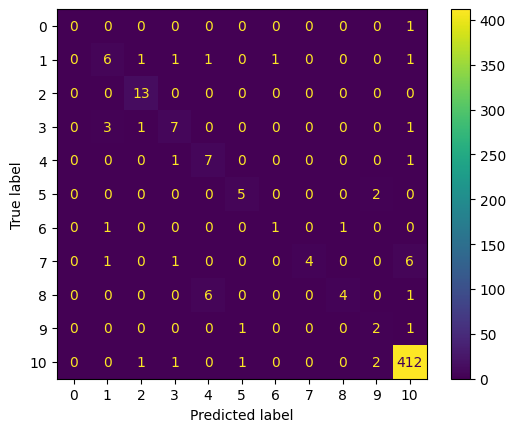

In [23]:
cm = metrics.confusion_matrix(test_data_label.to_list()[:500], 
                              y_pred_2_prediction_class[:500])

temp = ConfusionMatrixDisplay(confusion_matrix=cm,)
temp.plot()
plt.show()

In [27]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
text = nlp("The World Health Organization (WHO)[1] is a specialized agency of the United Nations responsible for international public health.[2] The WHO Constitution states its main objective as 'the attainment by all peoples of the highest possible level of health'.[3] Headquartered in Geneva, Switzerland, it has six regional offices and 150 field offices worldwide. The WHO was established on 7 April 1948.[4][5] The first meeting of the World Health Assembly (WHA), the agency's governing body, took place on 24 July of that year. The WHO incorporated the assets, personnel, and duties of the League of Nations' Health Organization and the Office International d'Hygiène Publique, including the International Classification of Diseases (ICD).[6] Its work began in earnest in 1951 after a significant infusion of financial and technical resources.[7]")
displacy.render(text, style = 'ent', jupyter=True)

In [25]:
prediction, model_outputs = model_pickle.predict(["The World Health Organization (WHO)[1] is a specialized agency of the United Nations responsible for international public health.[2] The WHO Constitution states its main objective as 'the attainment by all peoples of the highest possible level of health'.[3] Headquartered in Geneva, Switzerland, it has six regional offices and 150 field offices worldwide. The WHO was established on 7 April 1948.[4][5] The first meeting of the World Health Assembly (WHA), the agency's governing body, took place on 24 July of that year. The WHO incorporated the assets, personnel, and duties of the League of Nations' Health Organization and the Office International d'Hygiène Publique, including the International Classification of Diseases (ICD).[6] Its work began in earnest in 1951 after a significant infusion of financial and technical resources.[7]"])

Running Prediction: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


In [26]:
prediction

[[{'The': 'O'},
  {'World': 'B-ORG'},
  {'Health': 'I-ORG'},
  {'Organization': 'I-ORG'},
  {'(WHO)[1]': 'O'},
  {'is': 'O'},
  {'a': 'O'},
  {'specialized': 'O'},
  {'agency': 'O'},
  {'of': 'O'},
  {'the': 'O'},
  {'United': 'B-ORG'},
  {'Nations': 'I-ORG'},
  {'responsible': 'O'},
  {'for': 'O'},
  {'international': 'O'},
  {'public': 'O'},
  {'health.[2]': 'O'},
  {'The': 'O'},
  {'WHO': 'B-ORG'},
  {'Constitution': 'O'},
  {'states': 'O'},
  {'its': 'O'},
  {'main': 'O'},
  {'objective': 'O'},
  {'as': 'O'},
  {"'the": 'O'},
  {'attainment': 'O'},
  {'by': 'O'},
  {'all': 'O'},
  {'peoples': 'O'},
  {'of': 'O'},
  {'the': 'O'},
  {'highest': 'O'},
  {'possible': 'O'},
  {'level': 'O'},
  {'of': 'O'},
  {"health'.[3]": 'O'},
  {'Headquartered': 'O'},
  {'in': 'O'},
  {'Geneva,': 'B-GEO'},
  {'Switzerland,': 'B-GEO'},
  {'it': 'O'},
  {'has': 'O'},
  {'six': 'O'},
  {'regional': 'O'},
  {'offices': 'O'},
  {'and': 'O'},
  {'150': 'O'},
  {'field': 'O'},
  {'offices': 'O'},
  {'world

In [ ]:
# train_loss = train_return[0]['train_loss']
# eval_loss = train_return[0]['eval_loss']
# learning_rate = train_return[0]['lr']

# epochs = range(1, len(train_loss) + 1)

# plt.plot(epochs, train_loss, 'b', label='Training loss')
# plt.plot(epochs, eval_loss, 'r', label='Validation loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.plot(epochs, learning_rate, 'g')
# plt.title('Learning Rate')
# plt.xlabel('Epochs')
# plt.ylabel('Learning Rate')
# plt.show()
